# Using OMF-VTK Interfact

This notebook demos how to load [OMF](https://omf.readthedocs.io/en/latest/) project files into VTK data objects. These data objects are converted using the [`omfvtk` Python package](https://github.com/OpenGeoVis/omfvtk) and visualized using [`vtki`](https://github.com/akaszynski/vtki).

This requires:

- `pip install 'omfvtk>=0.0.2'`

In [1]:
import omfvtk
import vtki

## Open an OMF Project file

The file given is a simple file from the [OMF Python package repository](https://github.com/gmggroup/omf/tree/master/assets). PVGeo opens the project and returns all elements of the Project as a `vtki.MultiBlock` data object that can be used for eay access and plotting.

In [2]:
proj = omfvtk.load_project('assets/test_file.omf')
proj

(MultiBlock)0x11c98cbe8

## Visualize the Project

In [3]:
# view all of it in 3D
#proj.plot(notebook=False)

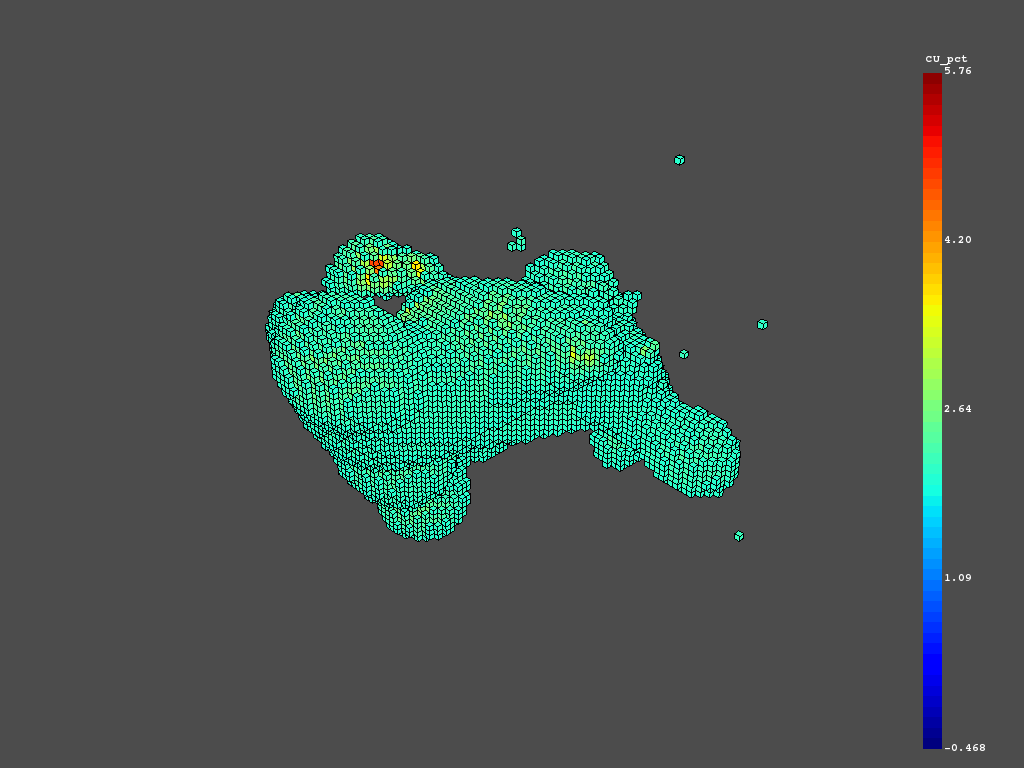

In [4]:
vol = proj['Block Model']
rng = vol.get_data_range('CU_pct')
thresh = vol.threshold(2) # -4.676e-01, 5.755e+00
thresh.plot(rng=rng)

In [5]:
# Grab a few elements of interest and plot em up!
assay = proj['wolfpass_WP_assay']
topo = proj['Topography']

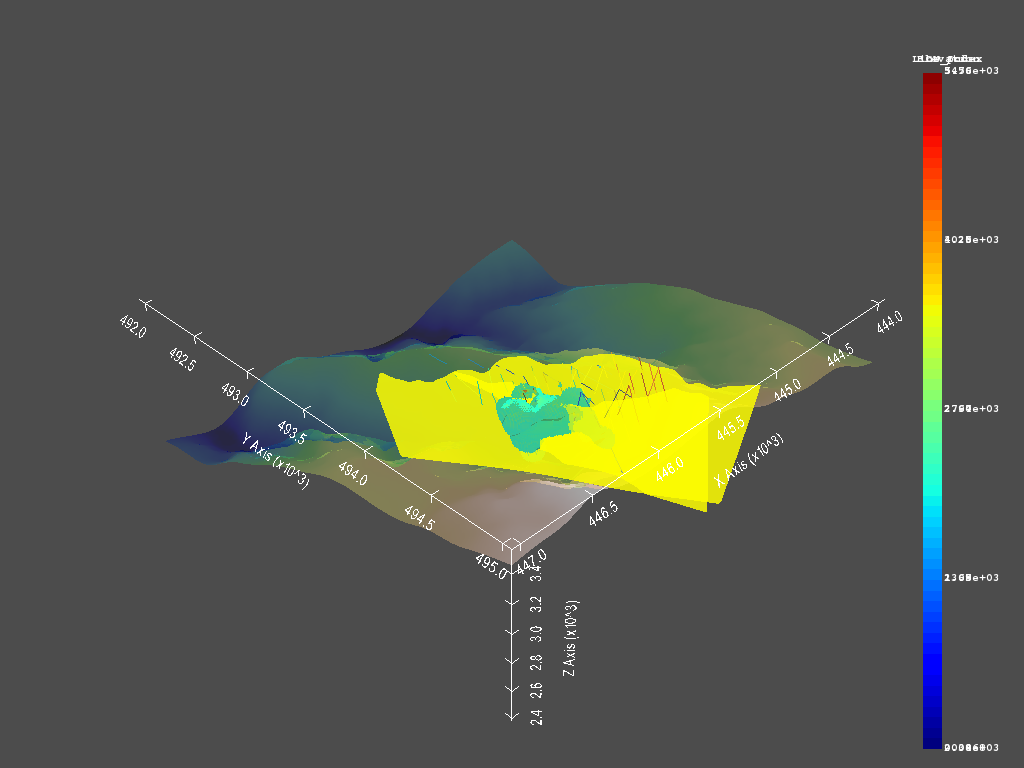

In [6]:
# NOTE: to plot interactively, change `notebook=False`
p = vtki.Plotter(notebook=True)

p.add_mesh(topo, colormap='gist_earth', showedges=False, opacity=0.5)
p.add_mesh(assay)
p.add_mesh(thresh, showedges=False, rng=rng, colormap='jet')
p.add_mesh(proj['Dacite'], showedges=False, color='yellow', opacity=0.6)

p.add_axes()
p.add_bounds_axes(topo)
p.plot()